<a href="https://colab.research.google.com/github/W5Wesley/CreditRisk/blob/main/Credit_Risk_LCDataDictionary.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
data_loan = pd.read_csv("/content/drive/MyDrive/My_Project/Credit Risk/loan_data_2007_2014.csv")

In [4]:
data_loan.sample(10)

,Unnamed: 0,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,...,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m
236672,236672,36451262,39172972,20000,20000,20000.0,36 months,6.49,612.89,A,...,NaN,NaN,NaN,NaN,NaN,NaN,71800.0,NaN,NaN,NaN
437593,437593,12465240,14477383,10575,10575,10575.0,60 months,15.61,254.98,C,...,NaN,NaN,NaN,NaN,NaN,NaN,4500.0,NaN,NaN,NaN
95225,95225,6974944,8617075,21000,21000,21000.0,60 months,15.88,509.35,C,...,NaN,NaN,NaN,NaN,NaN,NaN,81800.0,NaN,NaN,NaN
138616,138616,5029721,6332055,1200,1200,1200.0,36 months,21.49,45.52,E,...,NaN,NaN,NaN,NaN,NaN,NaN,7200.0,NaN,NaN,NaN
161439,161439,3497024,4379495,29700,29700,29600.0,60 months,20.49,794.99,E,...,NaN,NaN,NaN,NaN,NaN,NaN,20100.0,NaN,NaN,NaN
401727,401727,15199117,14328632,18325,18325,18325.0,60 months,21.99,506.02,E,...,NaN,NaN,NaN,NaN,NaN,NaN,32200.0,NaN,NaN,NaN
301854,301854,28332631,30855752,23000,23000,23000.0,36 months,10.99,752.89,B,...,NaN,NaN,NaN,NaN,NaN,NaN,43500.0,NaN,NaN,NaN
253177,253177,34593212,37276508,14000,14000,14000.0,60 months,17.86,354.45,D,...,NaN,NaN,NaN,NaN,NaN,NaN,15000.0,NaN,NaN,NaN
365300,365300,19256563,21449336,20000,20000,20000.0,60 months,14.49,470.47,C,...,NaN,NaN,NaN,NaN,NaN,NaN,35600.0,NaN,NaN,NaN
423564,423564,12917629,14949825,5000,5000,5000.0,36 months,10.99,163.67,B,...,NaN,NaN,NaN,NaN,NaN,NaN,11300.0,NaN,NaN,NaN


In [5]:
data_loan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 466285 entries, 0 to 466284
Data columns (total 75 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   Unnamed: 0                   466285 non-null  int64  
 1   id                           466285 non-null  int64  
 2   member_id                    466285 non-null  int64  
 3   loan_amnt                    466285 non-null  int64  
 4   funded_amnt                  466285 non-null  int64  
 5   funded_amnt_inv              466285 non-null  float64
 6   term                         466285 non-null  object 
 7   int_rate                     466285 non-null  float64
 8   installment                  466285 non-null  float64
 9   grade                        466285 non-null  object 
 10  sub_grade                    466285 non-null  object 
 11  emp_title                    438697 non-null  object 
 12  emp_length                   445277 non-null  object 
 13 

In [6]:
for column in data_loan.columns:
    if data_loan[column].isnull().sum()/466285 > 0.8:
        data_loan.drop(column, axis=1, inplace=True)

In [7]:
columns = []
for column in data_loan.columns:
    columns.append(column)
print(columns)

['Unnamed: 0', 'id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'term', 'int_rate', 'installment', 'grade', 'sub_grade', 'emp_title', 'emp_length', 'home_ownership', 'annual_inc', 'verification_status', 'issue_d', 'loan_status', 'pymnt_plan', 'url', 'desc', 'purpose', 'title', 'zip_code', 'addr_state', 'dti', 'delinq_2yrs', 'earliest_cr_line', 'inq_last_6mths', 'mths_since_last_delinq', 'open_acc', 'pub_rec', 'revol_bal', 'revol_util', 'total_acc', 'initial_list_status', 'out_prncp', 'out_prncp_inv', 'total_pymnt', 'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int', 'total_rec_late_fee', 'recoveries', 'collection_recovery_fee', 'last_pymnt_d', 'last_pymnt_amnt', 'next_pymnt_d', 'last_credit_pull_d', 'collections_12_mths_ex_med', 'mths_since_last_major_derog', 'policy_code', 'application_type', 'acc_now_delinq', 'tot_coll_amt', 'tot_cur_bal', 'total_rev_hi_lim']


In [8]:
missing_col = []
for column in data_loan.columns:
    if data_loan[column].isnull().any() == True:
        missing_col.append(column)
print(len(missing_col))

22


In [9]:
data_loan[missing_col].isnull().sum()

emp_title                       27588
emp_length                      21008
annual_inc                          4
desc                           340302
title                              20
delinq_2yrs                        29
earliest_cr_line                   29
inq_last_6mths                     29
mths_since_last_delinq         250351
open_acc                           29
pub_rec                            29
revol_util                        340
total_acc                          29
last_pymnt_d                      376
next_pymnt_d                   227214
last_credit_pull_d                 42
collections_12_mths_ex_med        145
mths_since_last_major_derog    367311
acc_now_delinq                     29
tot_coll_amt                    70276
tot_cur_bal                     70276
total_rev_hi_lim                70276
dtype: int64

#Feature Selection

In [10]:
credit_risk_columns = ['loan_amnt', 'term', 'int_rate', 'installment', 'grade', 'emp_length', 'home_ownership', 'annual_inc', 'verification_status','last_pymnt_amnt','dti','purpose','loan_status']
data_loan[credit_risk_columns].head()

,loan_amnt,term,int_rate,installment,grade,emp_length,home_ownership,annual_inc,verification_status,last_pymnt_amnt,dti,purpose,loan_status
0,5000,36 months,10.65,162.87,B,10+ years,RENT,24000.0,Verified,171.62,27.65,credit_card,Fully Paid
1,2500,60 months,15.27,59.83,C,< 1 year,RENT,30000.0,Source Verified,119.66,1.00,car,Charged Off
2,2400,36 months,15.96,84.33,C,10+ years,RENT,12252.0,Not Verified,649.91,8.72,small_business,Fully Paid
3,10000,36 months,13.49,339.31,C,10+ years,RENT,49200.0,Source Verified,357.48,20.00,other,Fully Paid
4,3000,60 months,12.69,67.79,B,1 year,RENT,80000.0,Source Verified,67.79,17.94,other,Current


In [11]:
credit_risk_data = data_loan[credit_risk_columns]
credit_risk_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 466285 entries, 0 to 466284
Data columns (total 13 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   loan_amnt            466285 non-null  int64  
 1   term                 466285 non-null  object 
 2   int_rate             466285 non-null  float64
 3   installment          466285 non-null  float64
 4   grade                466285 non-null  object 
 5   emp_length           445277 non-null  object 
 6   home_ownership       466285 non-null  object 
 7   annual_inc           466281 non-null  float64
 8   verification_status  466285 non-null  object 
 9   last_pymnt_amnt      466285 non-null  float64
 10  dti                  466285 non-null  float64
 11  purpose              466285 non-null  object 
 12  loan_status          466285 non-null  object 
dtypes: float64(5), int64(1), object(7)
memory usage: 46.2+ MB


In [12]:
credit_risk_data.sample(10)

,loan_amnt,term,int_rate,installment,grade,emp_length,home_ownership,annual_inc,verification_status,last_pymnt_amnt,dti,purpose,loan_status
48859,27575,60 months,23.70,788.49,F,10+ years,MORTGAGE,80000.0,Verified,25988.66,20.49,debt_consolidation,Fully Paid
424040,35000,36 months,19.47,1291.30,D,10+ years,MORTGAGE,130996.0,Verified,1291.30,23.78,home_improvement,Current
142353,8475,36 months,10.16,274.11,B,10+ years,RENT,50000.0,Not Verified,6204.53,26.59,debt_consolidation,Fully Paid
62921,8000,36 months,9.67,256.90,B,8 years,RENT,40000.0,Not Verified,4771.96,12.30,debt_consolidation,Fully Paid
140764,25000,60 months,23.83,716.74,F,10+ years,RENT,115000.0,Verified,1469.32,19.45,other,Charged Off
188521,3825,36 months,8.90,121.46,A,NaN,OWN,13200.0,Verified,121.29,19.55,debt_consolidation,Fully Paid
255188,9875,36 months,16.49,349.57,D,9 years,MORTGAGE,60000.0,Source Verified,349.57,18.48,debt_consolidation,Current
300546,7000,36 months,13.35,237.04,C,3 years,MORTGAGE,60000.0,Source Verified,5240.76,17.12,debt_consolidation,Fully Paid
82253,7500,36 months,11.99,249.08,B,NaN,MORTGAGE,33000.0,Verified,249.08,26.22,debt_consolidation,Current
76939,3825,36 months,14.30,131.29,C,3 years,RENT,170000.0,Verified,1374.21,0.42,debt_consolidation,Fully Paid


#Data Cleaning

In [13]:
credit_risk_data.isnull().sum()

loan_amnt                  0
term                       0
int_rate                   0
installment                0
grade                      0
emp_length             21008
home_ownership             0
annual_inc                 4
verification_status        0
last_pymnt_amnt            0
dti                        0
purpose                    0
loan_status                0
dtype: int64

In [14]:
#fill missing value with 0
credit_risk_data.fillna(0, inplace=True)
credit_risk_data.isna().sum()

loan_amnt              0
term                   0
int_rate               0
installment            0
grade                  0
emp_length             0
home_ownership         0
annual_inc             0
verification_status    0
last_pymnt_amnt        0
dti                    0
purpose                0
loan_status            0
dtype: int64

In [15]:
#Categories label column
label_categories = [
    (0, ['Fully Paid', 'Does not meet the credit policy. Status:Fully Paid', 'Current']),
    (1, ['Late (31-120 days)', 'Late (16-30 days)', 'In Grace Period', 
         'Charged Off', 'Default', 'Does not meet the credit policy. Status:Charged Off'])
]

In [16]:
#create function to apply new catergory in label
def classify_label(text):
    for condition, label in label_categories:
        if any(match in text for match in label):
            return condition
    return None

In [17]:
credit_risk_data.loc[:, 'label'] = credit_risk_data['loan_status'].apply(classify_label)
credit_risk_data = credit_risk_data.drop('loan_status', axis=1)

In [18]:
credit_risk_data.sample(10)

,loan_amnt,term,int_rate,installment,grade,emp_length,home_ownership,annual_inc,verification_status,last_pymnt_amnt,dti,purpose,label
264864,5000,36 months,12.49,167.25,B,0,MORTGAGE,55000.0,Verified,167.25,19.03,other,0
40791,20000,36 months,17.39,716.95,E,8 years,MORTGAGE,105000.0,Verified,757.47,21.58,debt_consolidation,0
83549,12000,36 months,10.99,392.81,B,3 years,MORTGAGE,110000.0,Source Verified,10359.68,10.73,credit_card,0
47528,15000,36 months,8.90,476.30,A,10+ years,OWN,39000.0,Source Verified,476.30,26.15,credit_card,0
42230,10000,36 months,10.59,325.45,C,< 1 year,MORTGAGE,77000.0,Not Verified,325.45,16.54,debt_consolidation,1
71658,12000,60 months,24.50,348.71,F,10+ years,OWN,35000.0,Source Verified,348.71,34.57,debt_consolidation,1
103072,7000,36 months,15.88,245.69,C,2 years,MORTGAGE,49000.0,Source Verified,245.69,23.14,debt_consolidation,0
455076,5000,36 months,15.61,174.83,C,< 1 year,RENT,33000.0,Not Verified,174.83,24.22,debt_consolidation,1
292407,12000,60 months,13.35,275.20,C,< 1 year,RENT,60000.0,Source Verified,275.20,21.95,debt_consolidation,0
11062,15000,36 months,7.49,466.53,A,4 years,MORTGAGE,139500.0,Not Verified,484.44,7.08,debt_consolidation,0


##Univariate Analysis

In [19]:
numerical_data = credit_risk_data.select_dtypes(exclude='object')
categorical_data = credit_risk_data.select_dtypes(include='object')

##Numerical Analysis

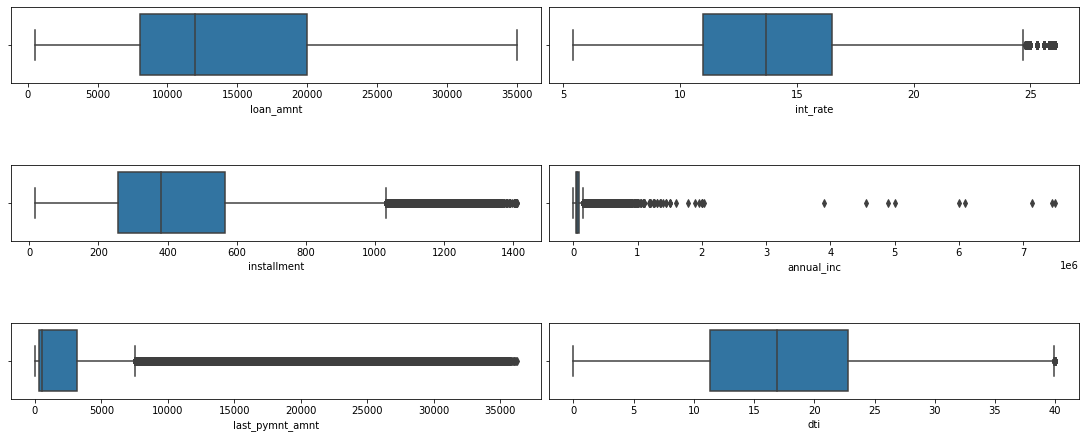

In [20]:
fig, axs = plt.subplots (ncols=2, nrows=3,figsize=(15,6))
index = 0
axs = axs.flatten()
for k,v in numerical_data.iloc[:,:-1].items():
    sns.boxplot(v, ax=axs[index])
    index += 1
plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=5.0)

##Categorical Analysis

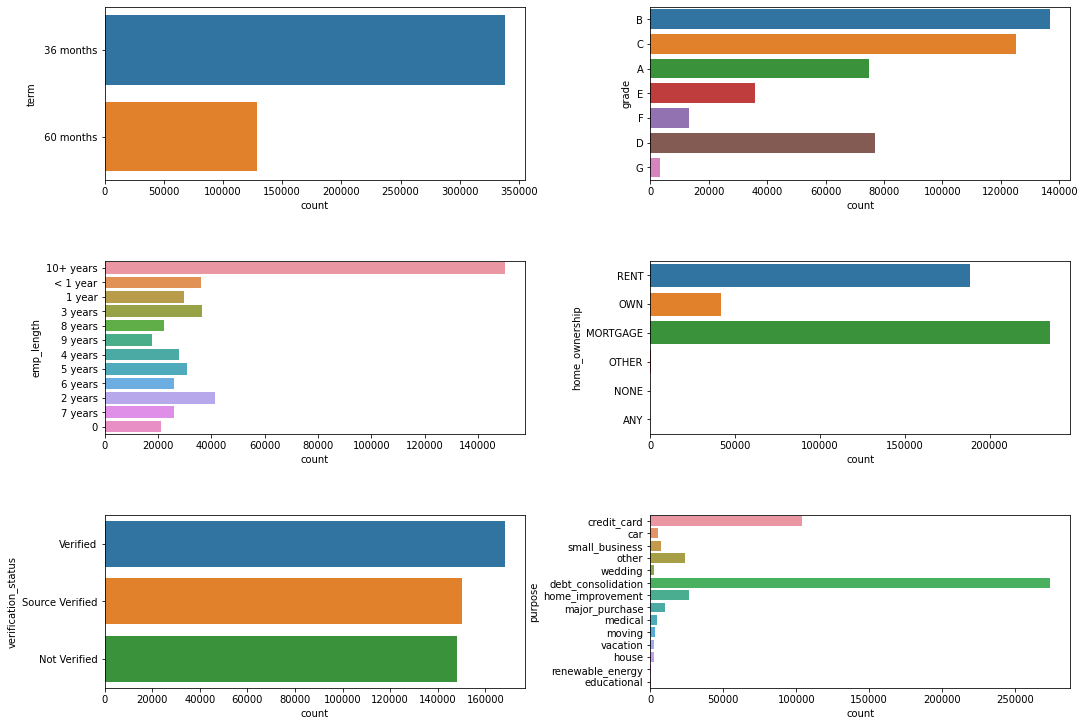

In [21]:
fig, axs = plt.subplots (ncols=2, nrows=3,figsize=(15,10))
index = 0
axs = axs.flatten()
for k,v in categorical_data.items():
    sns.countplot(y=v, ax=axs[index])
    index += 1
plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=5.0)

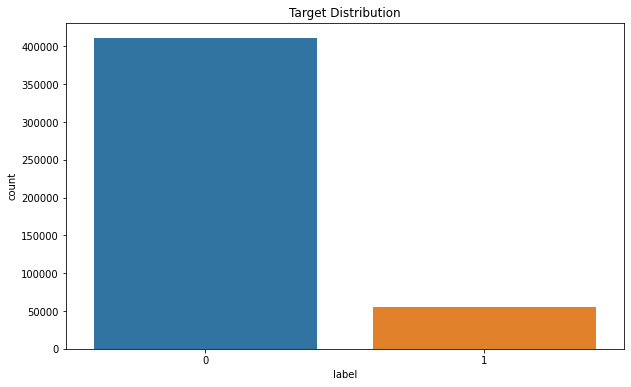

In [22]:
fig, ax = plt.subplots(figsize=(10,6))
sns.countplot(data=credit_risk_data, x='label').set_title('Target Distribution');

Data is inbalance!

##Multivariate Analysis

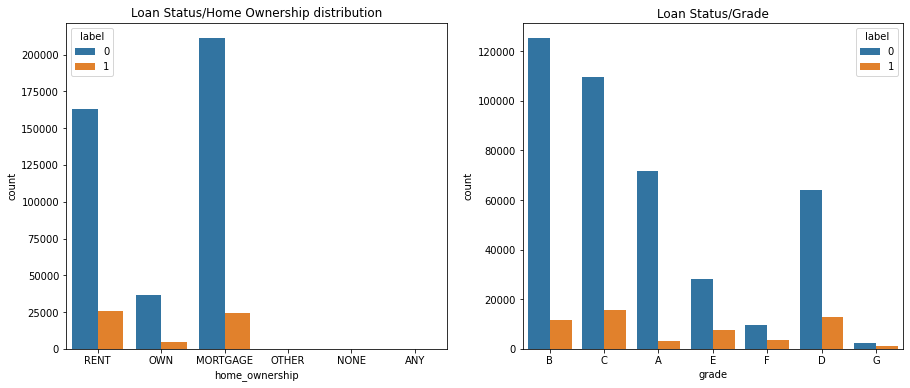

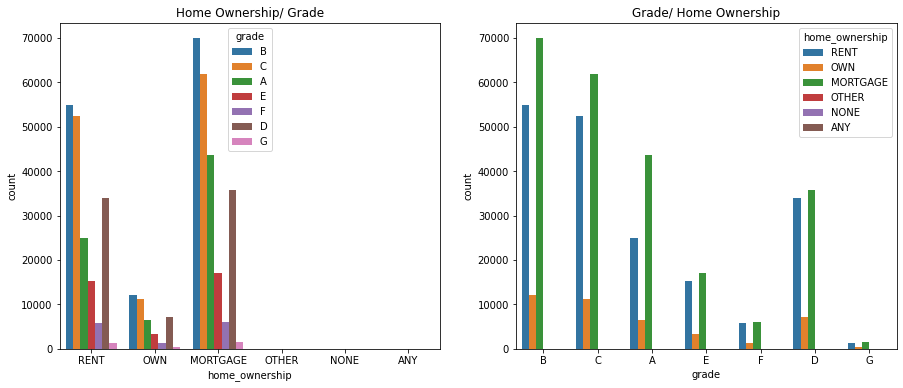

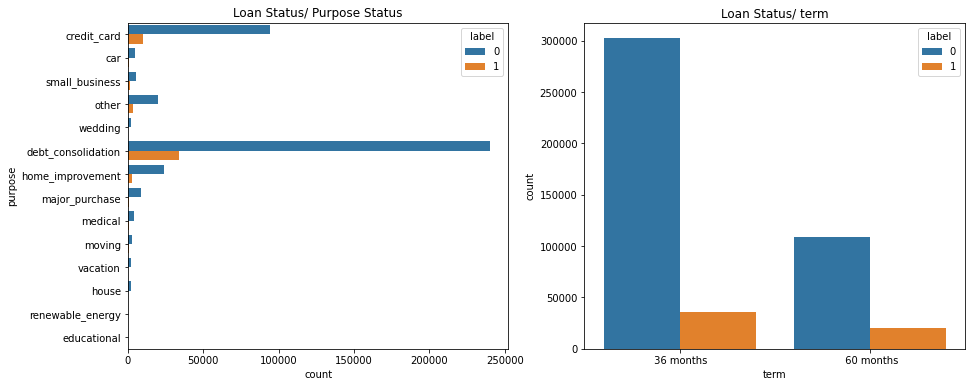

In [23]:
#Distribution with target
fig, ax = plt.subplots(1,2,figsize=(15,6))
sns.countplot(data=credit_risk_data, x='home_ownership', hue='label', ax=ax[0]).set_title("Loan Status/Home Ownership distribution");
sns.countplot(data=credit_risk_data, x='grade', hue='label', ax=ax[1]).set_title("Loan Status/Grade");

fig, ax = plt.subplots(1,2,figsize=(15,6))
sns.countplot(data=credit_risk_data, x='home_ownership', hue='grade', ax=ax[0]).set_title("Home Ownership/ Grade");
sns.countplot(data=credit_risk_data, x='grade', hue='home_ownership', ax=ax[1]).set_title("Grade/ Home Ownership");

fig, ax = plt.subplots(1,2,figsize=(15,6))
sns.countplot(data=credit_risk_data, y='purpose', hue='label', ax=ax[0]).set_title("Loan Status/ Purpose Status");
sns.countplot(data=credit_risk_data, x='term', hue='label', ax=ax[1]).set_title("Loan Status/ term");

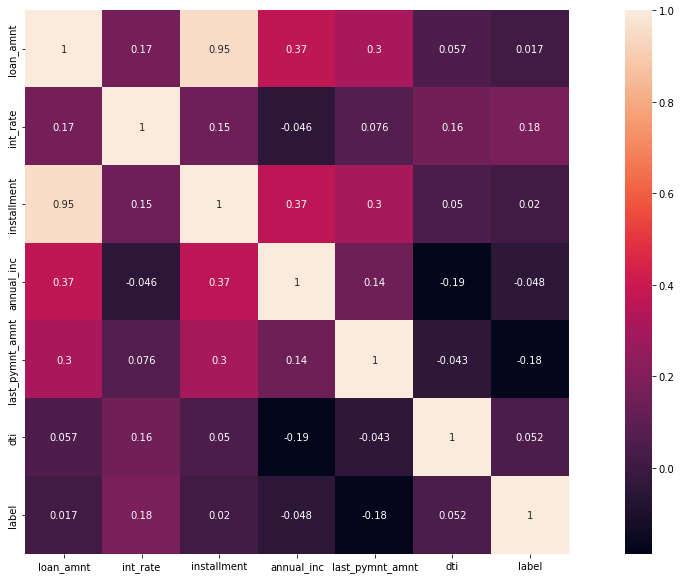

In [24]:
#Heat map Correlations
plt.figure(figsize = (20,10))
sns.heatmap(credit_risk_data.corr(),square = True, annot=True)
plt.show()

#Transform Data

In [25]:
#Transform term label
def condition_term(condition):
    if condition == " 36 months":
        return 36
    else:
        return 60

In [26]:
credit_risk_data['term'] = credit_risk_data['term'].apply(condition_term)

In [27]:
cat_columns = []
for cat in categorical_data.columns:
    cat_columns.append(cat)

In [28]:
cat_columns.pop(0)
cat_columns.remove('emp_length')


In [29]:
credit_risk_data.head()

,loan_amnt,term,int_rate,installment,grade,emp_length,home_ownership,annual_inc,verification_status,last_pymnt_amnt,dti,purpose,label
0,5000,36,10.65,162.87,B,10+ years,RENT,24000.0,Verified,171.62,27.65,credit_card,0
1,2500,60,15.27,59.83,C,< 1 year,RENT,30000.0,Source Verified,119.66,1.00,car,1
2,2400,36,15.96,84.33,C,10+ years,RENT,12252.0,Not Verified,649.91,8.72,small_business,0
3,10000,36,13.49,339.31,C,10+ years,RENT,49200.0,Source Verified,357.48,20.00,other,0
4,3000,60,12.69,67.79,B,1 year,RENT,80000.0,Source Verified,67.79,17.94,other,0


In [30]:
print(cat_columns)

['grade', 'home_ownership', 'verification_status', 'purpose']


In [31]:
from sklearn.preprocessing import LabelEncoder
LE = LabelEncoder()

In [32]:
credit_risk_data[cat_columns].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 466285 entries, 0 to 466284
Data columns (total 4 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   grade                466285 non-null  object
 1   home_ownership       466285 non-null  object
 2   verification_status  466285 non-null  object
 3   purpose              466285 non-null  object
dtypes: object(4)
memory usage: 14.2+ MB


In [33]:
#Apply Label encoding
for column in cat_columns:
    credit_risk_data[column] = LE.fit_transform(credit_risk_data[column])

In [34]:
#labeling emp_length
def emp_length(time):
    if time == "< 1 year":
        return 1
    elif time == "1 year":
        return 2
    elif time == "2 years":
        return 3
    elif time == "3 years":
        return 4
    elif time == "4 years":
        return 5
    elif time == "5 years":
        return 6
    elif time == "6 years":
        return 7
    elif time == "7 years":
        return 8
    elif time == "8 years":
        return 9
    elif time == "9 years":
        return 10
    elif time == "10 years":
        return 11
    elif time == "10+ years":
        return 12
    else:
        return 0
credit_risk_data['emp_length'] = credit_risk_data['emp_length'].apply(emp_length)

In [35]:
credit_risk_data.sample(20)

,loan_amnt,term,int_rate,installment,grade,emp_length,home_ownership,annual_inc,verification_status,last_pymnt_amnt,dti,purpose,label
51563,20000,36,9.67,642.25,1,2,5,50000.0,2,642.25,27.65,2,0
54797,24000,60,12.99,545.96,1,4,1,88000.0,2,545.96,14.07,1,0
460991,30000,60,16.99,745.42,3,1,5,83000.0,2,745.42,18.41,2,0
366189,12000,36,10.15,388.06,1,12,1,40000.0,0,391.69,18.99,2,0
366747,12800,60,15.61,308.63,3,12,5,90000.0,1,308.63,10.33,2,0
321031,30000,36,13.35,1015.89,2,12,5,70000.0,2,1015.89,26.44,2,0
464955,24000,36,8.90,762.08,0,12,1,90000.0,2,762.08,25.69,2,0
285375,15250,36,16.29,538.34,3,12,1,34000.0,2,538.34,21.71,2,0
175486,35000,36,15.31,1218.61,2,12,1,109500.0,2,12684.67,24.14,1,0
102570,10000,36,15.88,350.98,2,12,1,60000.0,0,7780.24,13.28,2,0


#Training Preparation

In [36]:
#Split X, y file for training preparation
X = credit_risk_data.drop(['label'], axis=1)
y = credit_risk_data['label']

In [56]:
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE

In [38]:
#Split data for test and training data
X_train,X_test,y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=1)

In [57]:
sm = SMOTE(random_state = 2)
X_train, y_train = sm.fit_resample(X_train, y_train)

#Modeling

In [46]:
# Using GridsearchCV + Random forest for classification
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV
xgb_clas = XGBClassifier()
rf_clf = RandomForestClassifier(random_state=42)

##Random Forest Classifier

In [78]:
parameters = {
    'n_estimators': (10,20,40),
    'max_depth':(1,2,5)
}
rf_clf_gridcv = GridSearchCV(rf_clf, parameters, cv=5, scoring='f1')
rf_clf_gridcv.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42),
             param_grid={'max_depth': (1, 2, 5), 'n_estimators': (10, 20, 40)},
             scoring='f1')

In [81]:
y_pred_proba = rf_clf_gridcv.predict_proba(X_test)[:][:,1]

df_actual_predicted = pd.concat([pd.DataFrame(np.array(y_test), columns=['y_actual']), pd.DataFrame(y_pred_proba, columns=['y_pred_proba'])], axis=1)
df_actual_predicted.index = y_test.index

#Evaluation

In [82]:
from sklearn.metrics import roc_curve, roc_auc_score

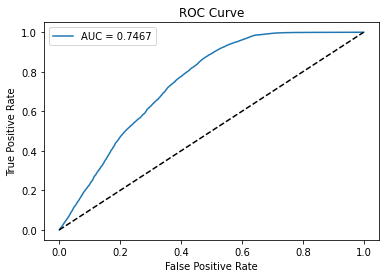

In [83]:
fpr, tpr, tr = roc_curve(df_actual_predicted['y_actual'], df_actual_predicted['y_pred_proba'])
auc = roc_auc_score(df_actual_predicted['y_actual'], df_actual_predicted['y_pred_proba'])

plt.plot(fpr, tpr, label='AUC = %0.4f' %auc)
plt.plot(fpr, fpr, linestyle = '--', color='k')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()

In [84]:
df_actual_predicted = df_actual_predicted.sort_values('y_pred_proba')
df_actual_predicted = df_actual_predicted.reset_index()

df_actual_predicted['Cumulative N Population'] = df_actual_predicted.index + 1
df_actual_predicted['Cumulative N Bad'] = df_actual_predicted['y_actual'].cumsum()
df_actual_predicted['Cumulative N Good'] = df_actual_predicted['Cumulative N Population'] - df_actual_predicted['Cumulative N Bad']
df_actual_predicted['Cumulative Perc Population'] = df_actual_predicted['Cumulative N Population'] / df_actual_predicted.shape[0]
df_actual_predicted['Cumulative Perc Bad'] = df_actual_predicted['Cumulative N Bad'] / df_actual_predicted['y_actual'].sum()
df_actual_predicted['Cumulative Perc Good'] = df_actual_predicted['Cumulative N Good'] / (df_actual_predicted.shape[0] - df_actual_predicted['y_actual'].sum())

In [85]:
df_actual_predicted.head()

,index,y_actual,y_pred_proba,Cumulative N Population,Cumulative N Bad,Cumulative N Good,Cumulative Perc Population,Cumulative Perc Bad,Cumulative Perc Good
0,440337,0,0.010919,1,0,1,0.000007,0.0,0.000008
1,8801,0,0.010919,2,0,2,0.000014,0.0,0.000016
2,18841,0,0.010919,3,0,3,0.000021,0.0,0.000024
3,176359,0,0.010919,4,0,4,0.000029,0.0,0.000032
4,178050,0,0.010919,5,0,5,0.000036,0.0,0.000041


Text(0.5, 1.0, 'Kolmogorov-Smirnov:  0.3941')

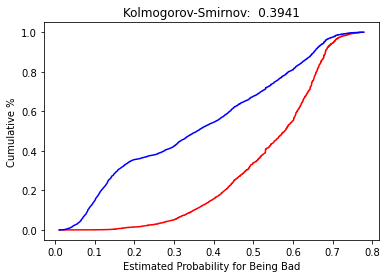

In [86]:
KS = max(df_actual_predicted['Cumulative Perc Good'] - df_actual_predicted['Cumulative Perc Bad'])

plt.plot(df_actual_predicted['y_pred_proba'], df_actual_predicted['Cumulative Perc Bad'], color='r')
plt.plot(df_actual_predicted['y_pred_proba'], df_actual_predicted['Cumulative Perc Good'], color='b')
plt.xlabel('Estimated Probability for Being Bad')
plt.ylabel('Cumulative %')
plt.title('Kolmogorov-Smirnov:  %0.4f' %KS)

Model yang dibangun menghasilkan performa `AUC = 0.7467` dan `KS = 0.3941`. Pada dunia credit risk modeling, umumnya AUC di atas 0.7 dan KS di atas 0.3 sudah termasuk performa yang baik.

##Feature Importance

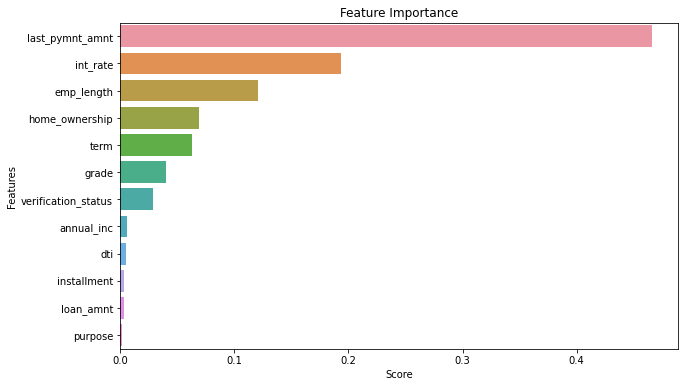

In [93]:
#Create Feature Importance
from sklearn.inspection import permutation_importance
feature = pd.Series(rf_clf_gridcv.best_estimator_.feature_importances_, index = X_train.columns).sort_values(ascending = False)
plt.figure(figsize = (10,6))
sns.barplot(x = feature, y = feature.index)
plt.title("Feature Importance")
plt.xlabel('Score')
plt.ylabel('Features')
plt.show()